## Practical Work 2

For this practical work, the trainees will have to develop a Python program that is able to implement the gradient descent variants (Batch/Mini-Batch/Stochastic) in order to achieve the linear regression of a set of datapoints.
##### Please notice that we will apply these algorithm to single variable LR.

#### Import numpy, matplotlib.pyplot and make it inline

In [1]:
import numpy as np
import matplotlib.pyplot as plt

To have a dataset or set of data points, the trainee must generate a pair of arrays <b>X</b> and <b>y</b> with the values in <b>X</b> equally distributed between <b>0</b> and <b>20</b> and the values in <b>y</b> such that:
<b>yi = a*xi + b (and a = -2, b = 1)</b>


In [2]:
X = np.linspace(0,20)
X

array([ 0.        ,  0.40816327,  0.81632653,  1.2244898 ,  1.63265306,
        2.04081633,  2.44897959,  2.85714286,  3.26530612,  3.67346939,
        4.08163265,  4.48979592,  4.89795918,  5.30612245,  5.71428571,
        6.12244898,  6.53061224,  6.93877551,  7.34693878,  7.75510204,
        8.16326531,  8.57142857,  8.97959184,  9.3877551 ,  9.79591837,
       10.20408163, 10.6122449 , 11.02040816, 11.42857143, 11.83673469,
       12.24489796, 12.65306122, 13.06122449, 13.46938776, 13.87755102,
       14.28571429, 14.69387755, 15.10204082, 15.51020408, 15.91836735,
       16.32653061, 16.73469388, 17.14285714, 17.55102041, 17.95918367,
       18.36734694, 18.7755102 , 19.18367347, 19.59183673, 20.        ])

In [3]:
X.shape

(50,)

In [5]:
a=-2
b=1
y=a*X+b
y

array([  1.        ,   0.18367347,  -0.63265306,  -1.44897959,
        -2.26530612,  -3.08163265,  -3.89795918,  -4.71428571,
        -5.53061224,  -6.34693878,  -7.16326531,  -7.97959184,
        -8.79591837,  -9.6122449 , -10.42857143, -11.24489796,
       -12.06122449, -12.87755102, -13.69387755, -14.51020408,
       -15.32653061, -16.14285714, -16.95918367, -17.7755102 ,
       -18.59183673, -19.40816327, -20.2244898 , -21.04081633,
       -21.85714286, -22.67346939, -23.48979592, -24.30612245,
       -25.12244898, -25.93877551, -26.75510204, -27.57142857,
       -28.3877551 , -29.20408163, -30.02040816, -30.83673469,
       -31.65306122, -32.46938776, -33.28571429, -34.10204082,
       -34.91836735, -35.73469388, -36.55102041, -37.36734694,
       -38.18367347, -39.        ])

### Plot X vs. y

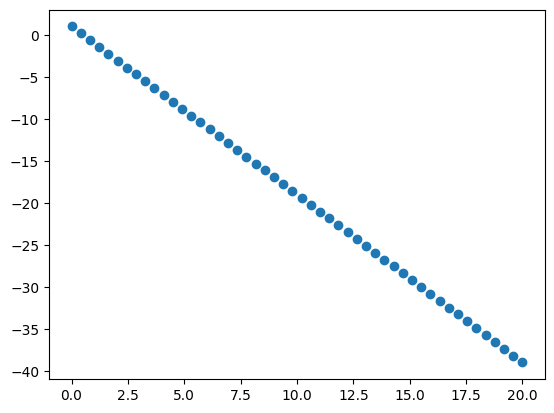

In [5]:
plt.scatter(X,y)

#### Use your code from practical session 1 and create a function to perform GD for single variable linear regression.
#### The function should take the following input parameters:
##### Input data (X), Target Labels (y), Learning Rate (alpha), Maximum number of iterations
#### The function should return the following:
##### All Theta_0 and Theta_1 values till converge, and equivellant Losses, all hypothesis output, and optimum values of Theta_0 and Theta_1
#### Implement the stop criteria (Gradient Check).
#### Implement the convergence check (cost check).
#### You can use any small values for stop criteria and convergence check. However, the used values in the current implementation used 0.001 for both.

In [7]:
from sklearn.metrics import r2_score

In [9]:
def GD_single_var(X , y , alpha , max_iterations):

  theta_0 =0
  theta_1 = 0
  theta_0_lst =[]
  theta_1_lst = []
  iteration_loss = [0]
  hypothesis_out =[]
  error_vector =[]


  for i in range (max_iterations):
    print (f'------------------------- Iteration  {i} -------------------------')
    print()

    y_pred =  theta_0 + theta_1 * X
    hypothesis_out.append(y_pred)
    print('h(x) : ' , y_pred )
    print()

    error = y_pred - y
    error_vector.append(error)
    print("Error Vector : " , error)
    print()

    j = (1 / (2 * X.shape[0]) ) *(np.linalg.norm(error) ** 2)
    iteration_loss.append(j)
    print('j = ' , j)
    print()

    d_theta_0 =  (error).sum() / ( X.shape[0] )
    d_theta_1 =  (error @ X).sum() / ( X.shape[0] )
    gradiant_vector = np.array([[d_theta_0] , [d_theta_1]])
    print()

    print('Gradiant Vector  = ', gradiant_vector )
    print()
    gradiant_vector_norm = np.linalg.norm(gradiant_vector )
    print('Gradiant Vector Norm = ', gradiant_vector_norm)
    print()

    if gradiant_vector_norm < 0.001 or (abs(iteration_loss[i] - iteration_loss[i-1]) )< 0.001 :

        del iteration_loss[-1]
        del hypothesis_out[-1]
        del error_vector[-1]
        no_of_iterations = i

        print(f'---------- gradiant descent covered after {i} iterartions -----------')
        print ('theta_0_opt' , theta_0)
        print ('theta_1_opt' , theta_1)
        print("Error Vector : " , error_vector[-1])
        print()

        print('cost : ' , iteration_loss[-1])
        print()

        print('h(x) : ' , hypothesis_out[-1] )
        print('y_actual : ' , y)
        print()

        return theta_0_lst , theta_1_lst , iteration_loss[1:] , hypothesis_out , theta_0 , theta_1 , no_of_iterations
        break

    theta_0 = theta_0 - alpha * d_theta_0
    theta_0_lst.append(theta_0)
    print('theta_0_new : ' , theta_0)

    print()
    theta_1 = theta_1 - alpha * d_theta_1
    theta_1_lst.append(theta_1)
    print('theta_1_new : ' , theta_1)


#### Try your function with any input parameterss of your choice.
##### The following results uses alpha = 0.0005 and max. iterations = 300.

In [11]:
theta_0_lst , theta_1_lst , iteration_loss , hypothesis_out , theta_0 , theta_1 , no_of_iterations = GD_single_var(X , y , 0.0005 , 300)

------------------------- Iteration  0 -------------------------

h(x) :  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]

Error Vector :  [-1.         -0.18367347  0.63265306  1.44897959  2.26530612  3.08163265
  3.89795918  4.71428571  5.53061224  6.34693878  7.16326531  7.97959184
  8.79591837  9.6122449  10.42857143 11.24489796 12.06122449 12.87755102
 13.69387755 14.51020408 15.32653061 16.14285714 16.95918367 17.7755102
 18.59183673 19.40816327 20.2244898  21.04081633 21.85714286 22.67346939
 23.48979592 24.30612245 25.12244898 25.93877551 26.75510204 27.57142857
 28.3877551  29.20408163 30.02040816 30.83673469 31.65306122 32.46938776
 33.28571429 34.10204082 34.91836735 35.73469388 36.55102041 37.36734694
 38.18367347 39.        ]

j =  249.88775510204087


Gradiant Vector  =  [[ 19.       ]
 [259.3877551]]

Gradiant Vector Norm =  260.08269357432516

theta_0_new :  -0.0095


#### Calculate r2 score

In [41]:
y_pred = theta_0 + theta_1 * X

In [43]:
len(y_pred)

50

In [44]:
print("r2_score : " ,r2_score(y , y_pred))

r2_score :  0.9975512733076476


##### It is recommended to define a function for each plot. This will help you to easly plot the learning curves when you use different values of hyperparameters.

#### Plot loss vs. epochs

In [45]:
def loss_epochs(epochs , loss):
  plt.plot(epochs , loss)
  plt.scatter(epochs , loss)
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.grid()
  plt.show()

In [57]:
no_of_iterations = np.arange(no_of_iterations)

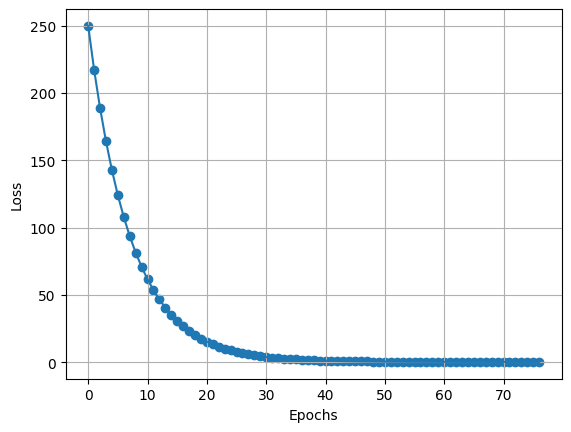

In [58]:
#no of epochs = no of iterations in single var GD
loss_epochs(no_of_iterations , iteration_loss)

#### Plot Theta_0 vs. loss and Theta_1 vs. loss

In [59]:
def theta_loss(theta_0 , theta_1 , loss):
    plt.figure(figsize =(8, 9))
    plt.suptitle('Learning Rate = 0.0005 ', fontsize=10)
    plt.subplot(2,1 ,1)
    plt.plot(theta_0 , loss)
    plt.scatter(theta_0 , loss)
    plt.xlabel('Theta_0')
    plt.ylabel('Loss')
    plt.grid()

    plt.subplot(2,1 ,2)
    plt.plot(theta_1 , loss)
    plt.scatter(theta_1 , loss)
    plt.xlabel('Theta_1')
    plt.ylabel('Loss')
    plt.grid()

    plt.show()

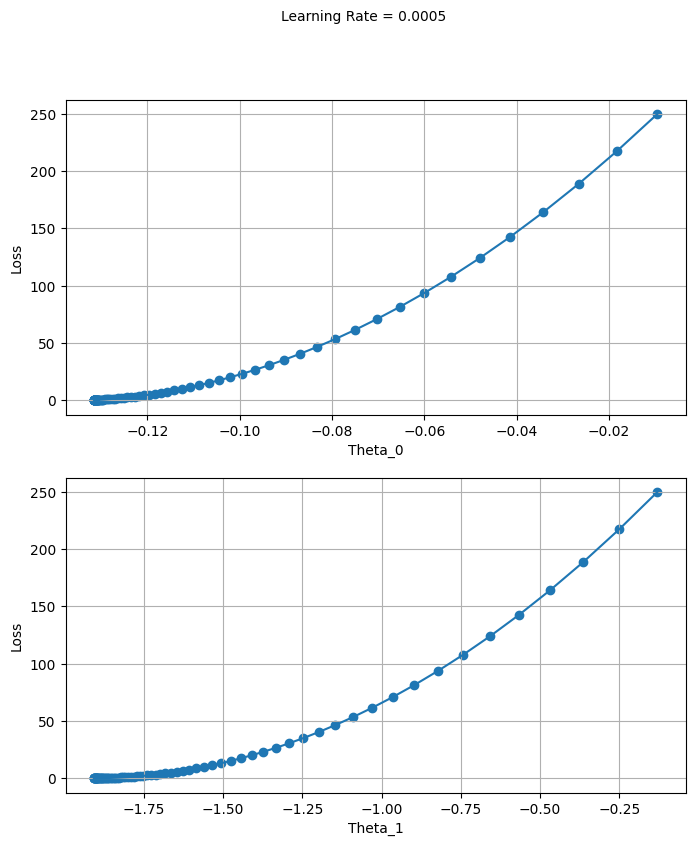

In [60]:
theta_loss(theta_0_lst , theta_1_lst , iteration_loss)

#### Plot all regression lines till converge

In [65]:
def regression_lines(X , y , y_pred_list):
  y_pred_arr = np.array(y_pred_list)
  plt.scatter(X , y)
  plt.plot(X,y_pred_arr.T,c='r')
  plt.xlabel('x')
  plt.ylabel('y')
  plt.grid()
  plt.show()

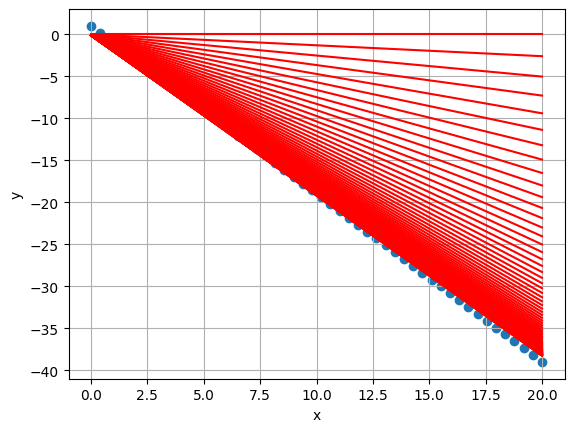

In [66]:
regression_lines(X , y , hypothesis_out)

#### Plot the best regression line

In [67]:
def best_regression_lines(X , y , y_pred):
  plt.scatter(X , y)
  plt.plot(X,y_pred,c='r')
  plt.xlabel('x')
  plt.ylabel('y')
  plt.grid()
  plt.show()

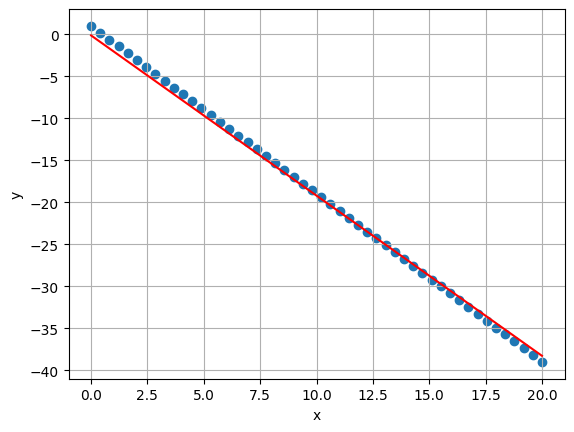

In [68]:
best_regression_lines(X , y , y_pred)

#### Try different learning rate and number of iterations then plot loss vs. epochs, loss vs. Theat_0 and Theta_1
#### all regression lines till converge, and the best regression line
#### and see the difference in output.

##### The following results uses alpha = 0.00005 and max. iterations = 1000.

In [13]:
theta_0_lst , theta_1_lst , iteration_loss , hypothesis_out , theta_0 , theta_1 , no_of_iterations = GD_single_var(X , y , 0.00005 , 1000)

------------------------- Iteration  0 -------------------------

h(x) :  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]

Error Vector :  [-1.         -0.18367347  0.63265306  1.44897959  2.26530612  3.08163265
  3.89795918  4.71428571  5.53061224  6.34693878  7.16326531  7.97959184
  8.79591837  9.6122449  10.42857143 11.24489796 12.06122449 12.87755102
 13.69387755 14.51020408 15.32653061 16.14285714 16.95918367 17.7755102
 18.59183673 19.40816327 20.2244898  21.04081633 21.85714286 22.67346939
 23.48979592 24.30612245 25.12244898 25.93877551 26.75510204 27.57142857
 28.3877551  29.20408163 30.02040816 30.83673469 31.65306122 32.46938776
 33.28571429 34.10204082 34.91836735 35.73469388 36.55102041 37.36734694
 38.18367347 39.        ]

j =  249.88775510204087


Gradiant Vector  =  [[ 19.       ]
 [259.3877551]]

Gradiant Vector Norm =  260.08269357432516

theta_0_new :  -0.00095

In [77]:
y_pred = theta_0 + theta_1 * X

In [78]:
print("r2_score : " ,r2_score(y , y_pred))

r2_score :  0.9965933726454433


In [79]:
no_of_iterations = np.arange(no_of_iterations)

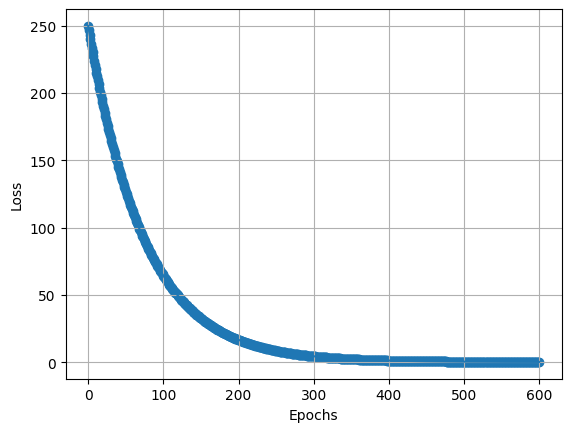

In [81]:
loss_epochs(no_of_iterations , iteration_loss)

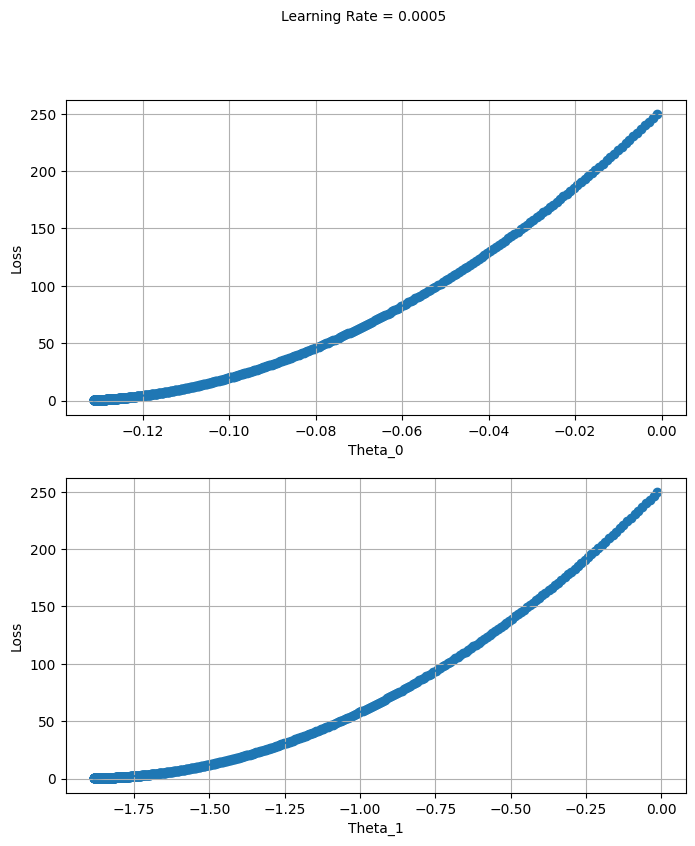

In [83]:
theta_loss(theta_0_lst , theta_1_lst , iteration_loss)

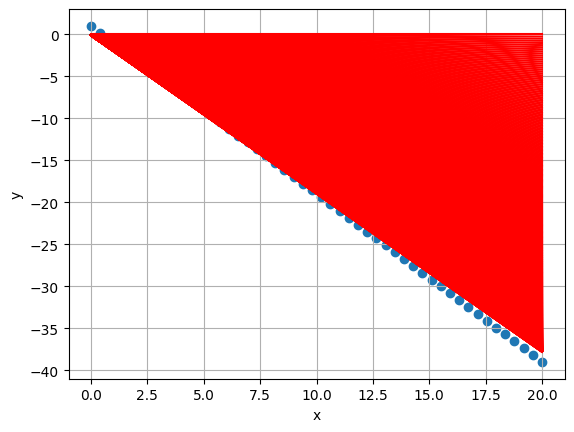

In [85]:
regression_lines(X , y , hypothesis_out)

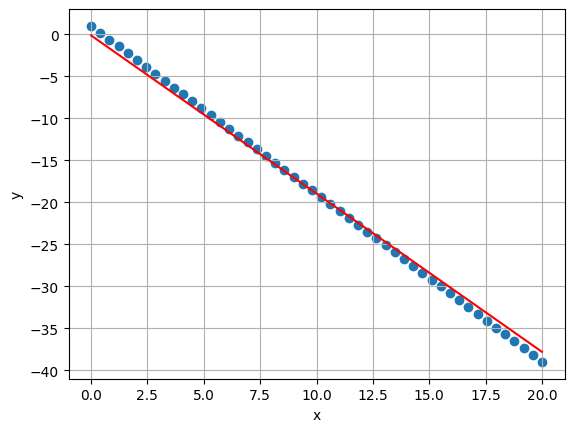

In [86]:
best_regression_lines(X , y , y_pred)

##### The following results uses alpha = 0.005 and max. iterations = 300.

In [15]:
theta_0_lst , theta_1_lst , iteration_loss , hypothesis_out , theta_0 , theta_1 , no_of_iterations = GD_single_var(X , y , 0.005 , 300)

------------------------- Iteration  0 -------------------------

h(x) :  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]

Error Vector :  [-1.         -0.18367347  0.63265306  1.44897959  2.26530612  3.08163265
  3.89795918  4.71428571  5.53061224  6.34693878  7.16326531  7.97959184
  8.79591837  9.6122449  10.42857143 11.24489796 12.06122449 12.87755102
 13.69387755 14.51020408 15.32653061 16.14285714 16.95918367 17.7755102
 18.59183673 19.40816327 20.2244898  21.04081633 21.85714286 22.67346939
 23.48979592 24.30612245 25.12244898 25.93877551 26.75510204 27.57142857
 28.3877551  29.20408163 30.02040816 30.83673469 31.65306122 32.46938776
 33.28571429 34.10204082 34.91836735 35.73469388 36.55102041 37.36734694
 38.18367347 39.        ]

j =  249.88775510204087


Gradiant Vector  =  [[ 19.       ]
 [259.3877551]]

Gradiant Vector Norm =  260.08269357432516

theta_0_new :  -0.095



In [91]:
print("r2_score : " ,r2_score(y , y_pred))

r2_score :  0.9965933726454433


r2_score: 0.9976200723230484


In [92]:
no_of_iterations = np.arange(no_of_iterations)

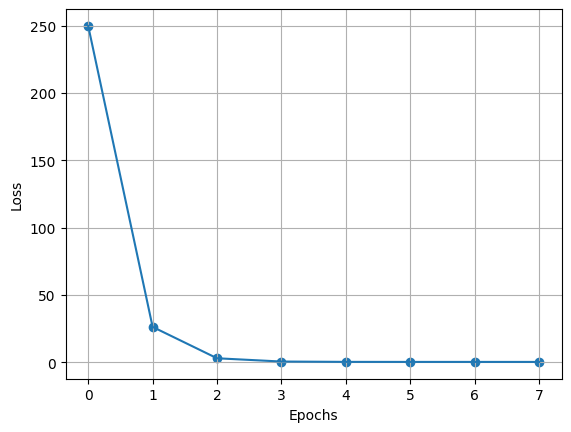

In [93]:
loss_epochs(no_of_iterations , iteration_loss)

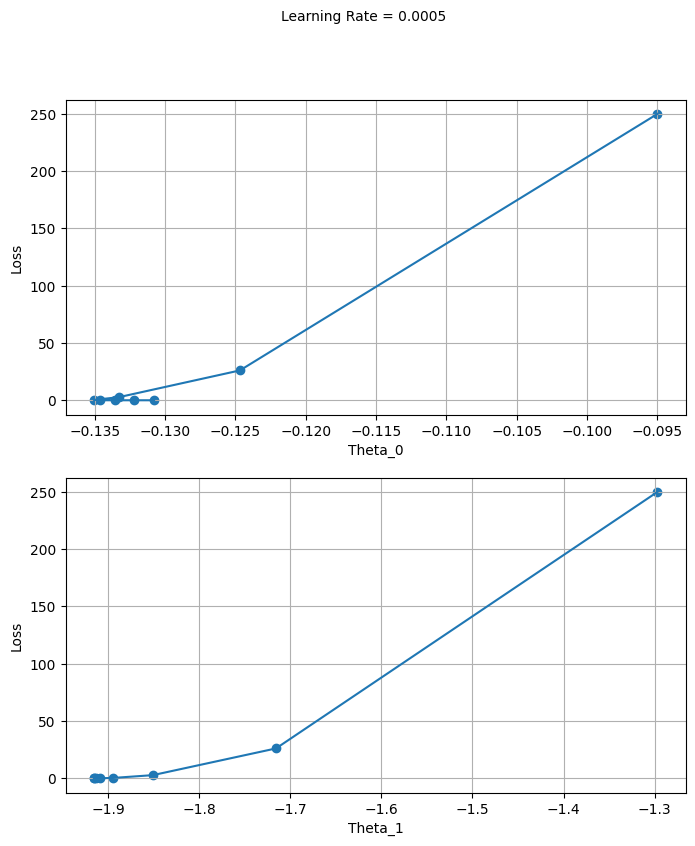

In [94]:
theta_loss(theta_0_lst , theta_1_lst , iteration_loss)

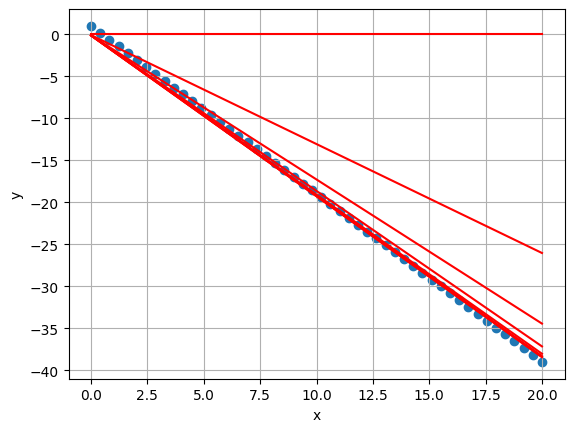

In [95]:
regression_lines(X , y , hypothesis_out)

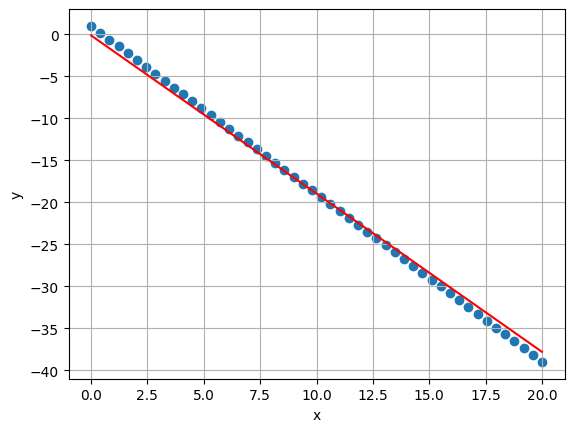

In [96]:
best_regression_lines(X , y , y_pred)

## Stochastic GD

#### Update the implementation of the Batch GD to be Stochastic and rpeat the above plots and evaluations
#### You can try different learning rate and see its effect.
#### Compare to the Batch GD.
#### Do not forget to shuffle the data.

##### Very Important notes:
- <font color='red'>Save your losses and thetas for each iterations (not each epoch).</font>
- <font color='red'>Plot loss vs. iterations (not epochs). This will allow you to see the difference between SGD (stochastic GD) and batch GD.</font>
- <font color='red'>Convergence check should be performed each epoch not each iterations. This allows you to perform more accurate decision. This is because the noisy process could lead to a deciving decision.</font>
- <font color='red'>Your result may be different from the results shown below due to the randomness of the process. As well as, the random shuffle. The results will be different also for two different run of the algorithm.</font>


In [244]:
def GD_single_var_stoc(X , y , alpha , no_of_epochs):

  shuffle_indices = np.random.permutation(len(X))
  X = X[shuffle_indices]
  y = y[shuffle_indices]

  theta_0 =0
  theta_1 = 0
  no_of_iterations = 0
  total_loss = 0
  total_d_theta_1 = 0
  total_d_theta_0 = 0


  iteration_loss = []
  theta_0_lst = []
  theta_1_lst = []
  hypothesis_out = []
  error_vector = []
  epoch_losses = [0]


  for e in range(no_of_epochs):
    print (f'------------------------- Epoch  {e} -------------------------')
    print()

    for i in range(X.shape[0]):

      y_pred =  theta_0 + theta_1 * X[i]
      error = y_pred - y[i]
      j = (1 /2) *(error ** 2)
      iteration_loss.append(j)

      d_theta_0 =  (error)
      d_theta_1 =  (error* X[i])

      gradiant_vector = np.array([[d_theta_0] , [d_theta_1]])
      gradiant_vector_norm = np.linalg.norm(gradiant_vector)

      theta_0 = theta_0 - alpha * d_theta_0
      theta_0_lst.append(theta_0)
      theta_1 = theta_1 - alpha * d_theta_1
      theta_1_lst.append(theta_1)
      no_of_iterations  = no_of_iterations + 1

    epoch_losses.append(j)
    hypothesis_out.append(y_pred)

    print('Cost = ' , epoch_losses[-1])
    print('Gradiant Vector  = ', gradiant_vector )
    print('Gradiant Vector Norm = ', gradiant_vector_norm)
    print ('theta_0_new' , theta_0)
    print ('theta_1_new' , theta_1)

    if gradiant_vector_norm < 0.001 or (abs(epoch_losses[e] - epoch_losses[e-1]))< 0.001 :
      print(f'---------- gradiant descent covered after {e} epochs -----------')
      print ('theta_0_opt' , theta_0)
      print ('theta_1_opt' , theta_1)
      print("Error Vector : " , error)
      print()

      print('cost : ' , epoch_losses[-1])
      print()

      print('h(x) : ' , y_pred )
      print('y_actual : ' , y)
      print()

      return theta_0_lst , theta_1_lst , epoch_losses[1:] , iteration_loss ,hypothesis_out , theta_0 , theta_1 , no_of_iterations
      break


##### The following results uses alpha = 0.0005 and max. iterations = 300.

In [257]:
theta_0_lst , theta_1_lst , epoch_losses ,iteration_loss, hypothesis_out , theta_0 , theta_1 , no_of_iterations = GD_single_var_stoc(X , y , 0.0005 , 300)

------------------------- Epoch  0 -------------------------

Cost =  0.7076447842694136
Gradiant Vector  =  [[ 1.18965943]
 [18.93743589]]
Gradiant Vector Norm =  18.974766599196837
theta_0_new -0.12303636186087588
theta_1_new -1.8642213495665632
------------------------- Epoch  1 -------------------------

Cost =  0.03665807257387966
Gradiant Vector  =  [[0.27076954]
 [4.31020904]]
Gradiant Vector Norm =  4.318705610203563
theta_0_new -0.11931532845600905
theta_1_new -1.9148377650049915
------------------------- Epoch  2 -------------------------

Cost =  0.02990202833673748
Gradiant Vector  =  [[0.24454868]
 [3.89281572]]
Gradiant Vector Norm =  3.900489488617869
theta_0_new -0.11223344645626694
theta_1_new -1.9167203402525241
------------------------- Epoch  3 -------------------------

Cost =  0.029360244218822676
Gradiant Vector  =  [[0.24232311]
 [3.85738824]]
Gradiant Vector Norm =  3.864992178391353
theta_0_new -0.10510601775056022
theta_1_new -1.9172901169132843
-------------

In [198]:
#question_for_ranges_of_values

****************** Epoch 0 ********************

Cost = 0.37828093829974396

Gradient Vector:
[[-0.86980565]
 [-1.77511358]]

Gradient Vector Norm:
1.9767625301666

theta_0_new : -0.13516909716690004
theta_1_new : -1.869971913093026

****************** Epoch 1 ********************

Cost = 0.4705021363396433

Gradient Vector:
[[-0.97005375]
 [-1.97970153]]

Gradient Vector Norm:
2.2045912095645743

theta_0_new : -0.13169704743062774
theta_1_new : -1.9207947829431942

****************** Epoch 2 ********************

Cost = 0.4672003879494755

Gradient Vector:
[[-0.96664408]
 [-1.97274302]]

Gradient Vector Norm:
2.196842232437341

theta_0_new : -0.12450421548406185
theta_1_new : -1.9226485332326042

****************** Epoch 3 ********************

Cost = 0.4612690180123547

Gradient Vector:
[[-0.96048844]
 [-1.96018048]]

Gradient Vector Norm:
2.1828526193936026

theta_0_new : -0.11725717626212058
theta_1_new : -1.923183317357008

****************** Epoch 4 ********************

Cost = 0

In [258]:
y_pred = theta_0 + theta_1 * X

In [259]:
print("r2_score : " ,r2_score(y , y_pred))

r2_score :  0.9977618155207493


In [260]:
no_of_iterations = np.arange(no_of_iterations)

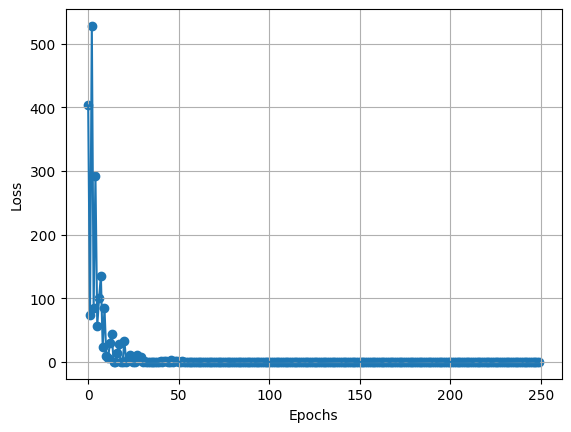

In [261]:
loss_epochs(no_of_iterations , iteration_loss)

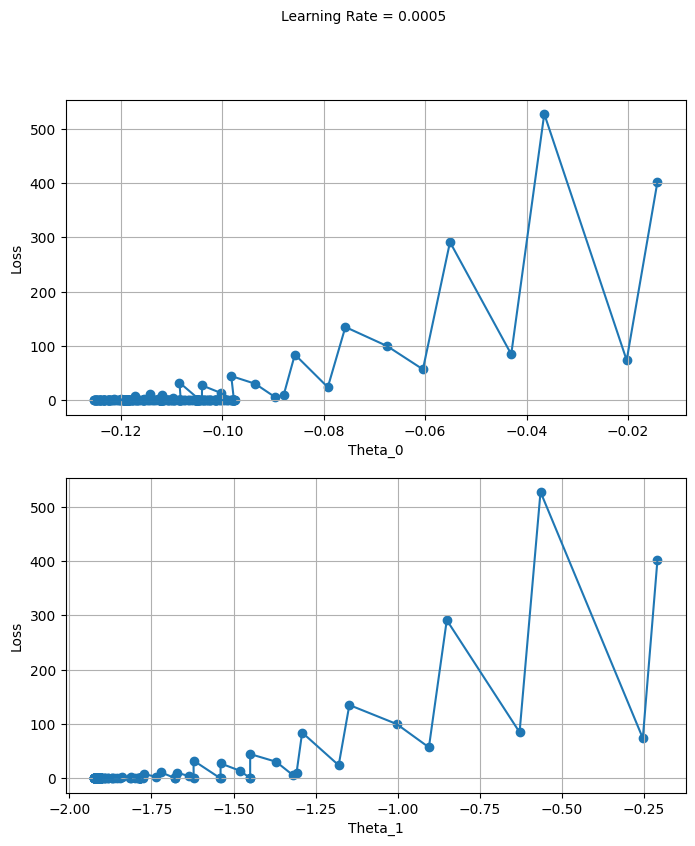

In [262]:
theta_loss(theta_0_lst , theta_1_lst , iteration_loss)

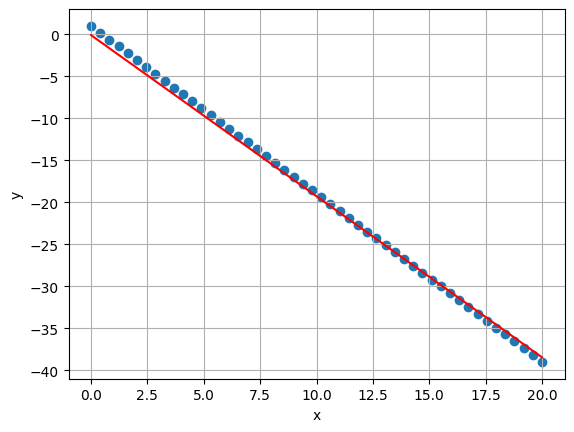

In [263]:
best_regression_lines(X , y ,y_pred)

##### The following results uses alpha = 0.0001 and max. iterations = 300.

In [264]:
theta_0_lst , theta_1_lst , epoch_losses ,iteration_loss, hypothesis_out , theta_0 , theta_1 , no_of_iterations = GD_single_var_stoc(X , y , 0.0001 , 300)

------------------------- Epoch  0 -------------------------

Cost =  56.46453060359983
Gradiant Vector  =  [[ 10.62680861]
 [117.11176834]]
Gradiant Vector Norm =  117.59292217333324
theta_0_new -0.06926349702749883
theta_1_new -0.9504973586464249
------------------------- Epoch  1 -------------------------

Cost =  13.77826445387742
Gradiant Vector  =  [[ 5.24943129]
 [57.85087548]]
Gradiant Vector Norm =  58.08855586905608
theta_0_new -0.10342982586207429
theta_1_new -1.4293693974603703
------------------------- Epoch  2 -------------------------

Cost =  3.2275319567694702
Gradiant Vector  =  [[ 2.54068178]
 [27.99935024]]
Gradiant Vector Norm =  28.114385604218555
theta_0_new -0.11991669799809802
theta_1_new -1.6706575717981629
------------------------- Epoch  3 -------------------------

Cost =  0.6918028843082712
Gradiant Vector  =  [[ 1.17626773]
 [12.96295048]]
Gradiant Vector Norm =  13.01620877163427
theta_0_new -0.12749837823013518
theta_1_new -1.7922615255889505
----------

****************** Epoch 0 ********************

Cost = 16.887127834434082

Gradient Vector:
[[ 5.81156224]
 [37.95305953]]

Gradient Vector Norm:
38.39542919503344

theta_0_new : -0.06824518438278841
theta_1_new : -0.9465294881483106

****************** Epoch 1 ********************

Cost = 3.4768759637568025

Gradient Vector:
[[ 2.63699676]
 [17.22120335]]

Gradient Vector Norm:
17.421928616911465

theta_0_new : -0.10250915532081234
theta_1_new : -1.4273881562733521

****************** Epoch 2 ********************

Cost = 0.5388930377939929

Gradient Vector:
[[1.03816476]
 [6.77985151]]

Gradient Vector Norm:
6.858875464652135

theta_0_new : -0.11904557794809867
theta_1_new : -1.6696771665089043

****************** Epoch 3 ********************

Cost = 0.027171708479479032

Gradient Vector:
[[0.23311675]
 [1.52239507]]

Gradient Vector Norm:
1.5401396595959387

theta_0_new : -0.1266525793929906
theta_1_new : -1.791785322149918

****************** Epoch 4 ********************

Cost = 0.

In [265]:
y_pred = theta_0 + theta_1 * X

In [266]:
print("r2_score : " ,r2_score(y , y_pred))

r2_score :  0.9976627144358454


In [267]:
no_of_iterations = np.arange(no_of_iterations)

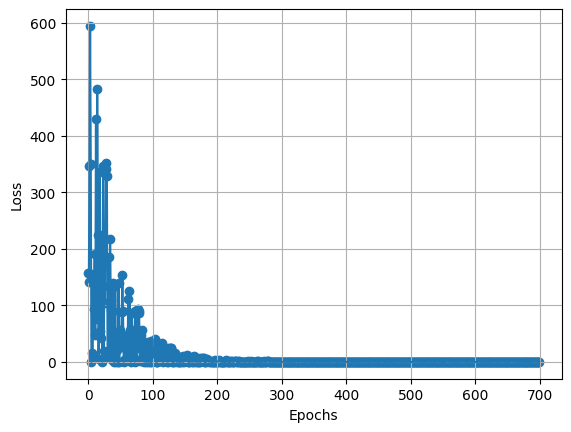

In [268]:
loss_epochs(no_of_iterations , iteration_loss)

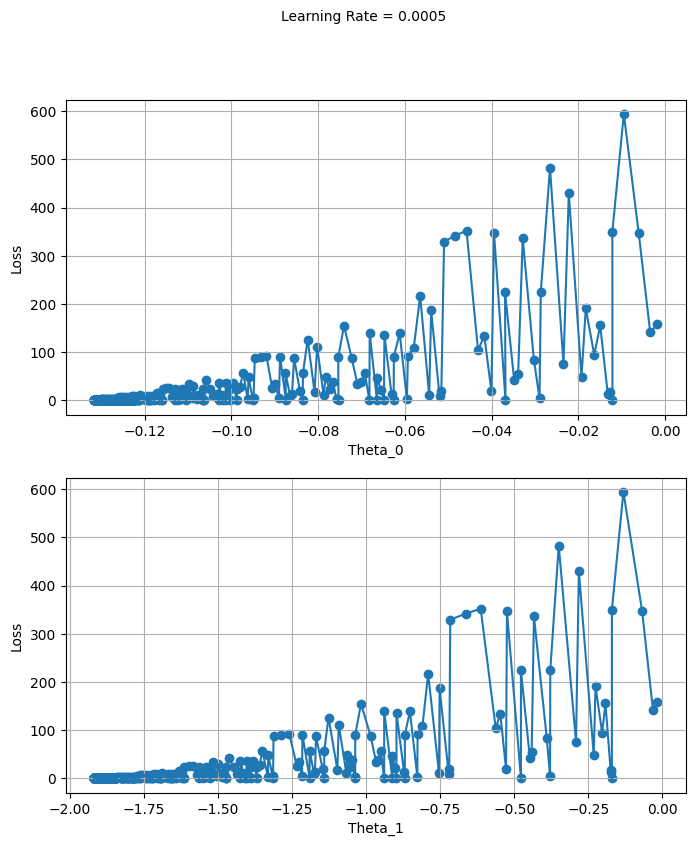

In [269]:
theta_loss(theta_0_lst , theta_1_lst , iteration_loss)

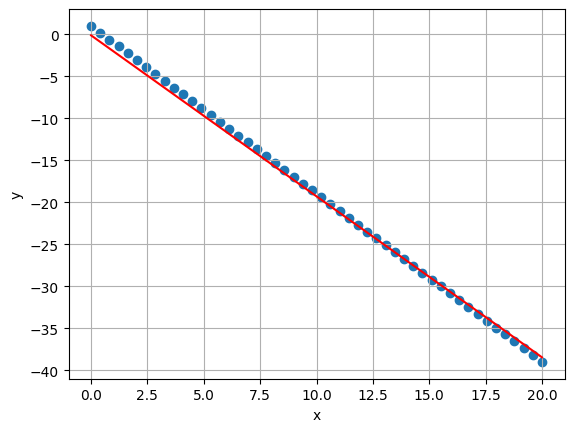

In [270]:
best_regression_lines(X ,y ,y_pred)

##### The following results uses alpha = 0.00007 and max. iterations = 300.

In [271]:
theta_0_lst , theta_1_lst , epoch_losses ,iteration_loss, hypothesis_out , theta_0 , theta_1 , no_of_iterations = GD_single_var_stoc(X , y , 0.00007 , 300)

------------------------- Epoch  0 -------------------------

Cost =  212.89348326108626
Gradiant Vector  =  [[ 20.63460604]
 [345.3138154 ]]
Gradiant Vector Norm =  345.9297877809734
theta_0_new -0.053598092871937494
theta_1_new -0.7282558378998867
------------------------- Epoch  1 -------------------------

Cost =  83.12655859052059
Gradiant Vector  =  [[ 12.89391784]
 [215.77576788]]
Gradiant Vector Norm =  216.16066969170774
theta_0_new -0.08643545279790094
theta_1_new -1.1797468829589326
------------------------- Epoch  2 -------------------------

Cost =  32.766107220182974
Gradiant Vector  =  [[  8.095197  ]
 [135.47064364]]
Gradiant Vector Norm =  135.71229680386006
theta_0_new -0.10640311021954096
theta_1_new -1.459665092873413
------------------------- Epoch  3 -------------------------

Cost =  13.108576975404059
Gradiant Vector  =  [[ 5.12026893]
 [85.68613317]]
Gradiant Vector Norm =  85.8389804920317
theta_0_new -0.11839289462678414
theta_1_new -1.6332213621841034
------

****************** Epoch 0 ********************

Cost = 124.0437076336173

Gradient Vector:
[[ 15.75079094]
 [205.72461637]]

Gradient Vector Norm:
206.32669530819234

theta_0_new : -0.051948440276973804
theta_1_new : -0.7135402661206246

****************** Epoch 1 ********************

Cost = 47.548348470307104

Gradient Vector:
[[  9.75175353]
 [127.36984205]]

Gradient Vector Norm:
127.7426058898493

theta_0_new : -0.0848670753436601
theta_1_new : -1.1703212347826775

****************** Epoch 2 ********************

Cost = 18.197486942756615

Gradient Vector:
[[ 6.0328247 ]
 [78.79607774]]

Gradient Vector Norm:
79.02668436189794

theta_0_new : -0.10488561670446958
theta_1_new : -1.453519053721322

****************** Epoch 3 ********************

Cost = 6.946707513134106

Gradient Vector:
[[ 3.72738716]
 [48.68424043]]

Gradient Vector Norm:
48.826720978186586

theta_0_new : -0.11690744458248394
theta_1_new : -1.6291086944831552

****************** Epoch 4 ********************

Cost

In [273]:
y_pred = theta_0 + theta_1 * X

In [274]:
print("r2_score : " ,r2_score(y , y_pred))

r2_score :  0.9976574155620829


In [275]:
no_of_iterations = np.arange(no_of_iterations)

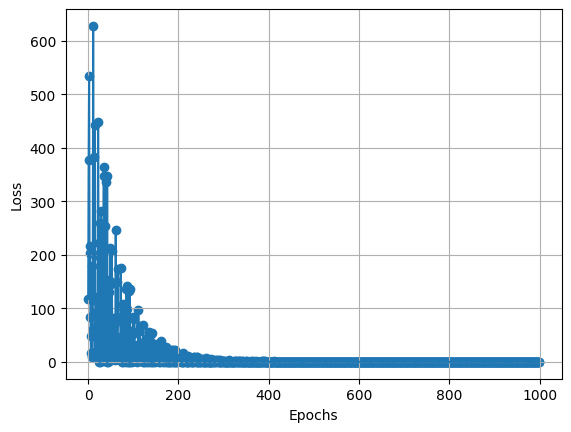

In [277]:
loss_epochs(no_of_iterations , iteration_loss)

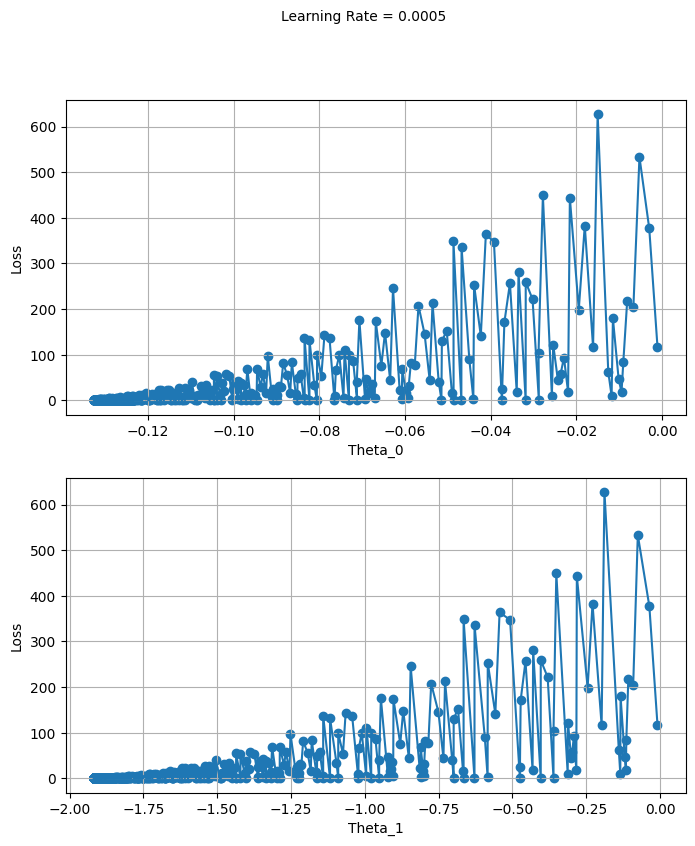

In [278]:
theta_loss(theta_0_lst , theta_1_lst , iteration_loss)

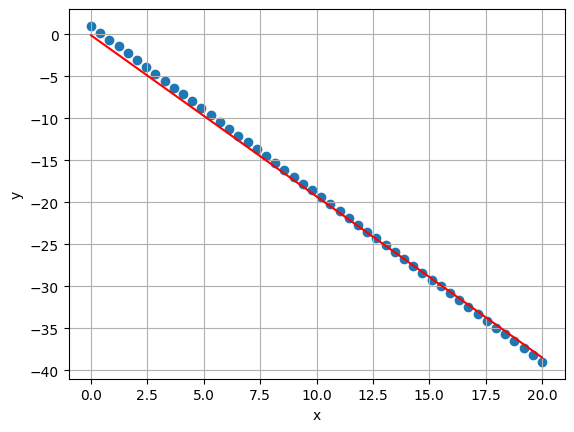

In [279]:
best_regression_lines(X ,y ,y_pred)

## Mini-Batch GD

#### Update the implementation of the Batch GD to be Mini-Batch and repeat the above plots and evaluations
#### Change batch size and see the effect
#### Do not forget to shuffle the data

##### Very Important notes:
- <font color='red'>Save your losses and thetas for each iterations (not each epoch).</font>
- <font color='red'>Plot loss vs. iterations (not epochs). This will allow you to see the difference between SGD (stochastic GD) and batch GD.</font>
- <font color='red'>Convergence check should be performed each epoch not each iterations. This allows you to perform more accurate decision. This is because the noisy process could lead to a deciving decision.</font>
-<font color='red'>Your result may be different from the results shown below due to the randomness of the process. As well as, the random shuffle. The results will be different also for two different run of the algorithm.</font>

In [21]:
def mini_batch_GD_single_var(X , y , alpha , no_of_epochs, batch_size):

  shuffle_indices = np.random.permutation(len(X))
  X = X[shuffle_indices]
  y = y[shuffle_indices]

  theta_0 =0
  theta_1 = 0
  no_of_iterations = 0
  iteration_loss = []
  hypothesis_out =[]
  #error_vect = []
  theta_0_lst = []
  theta_1_lst = []
  epoch_losses = [0]

  for e in range (no_of_epochs):
      print(f'------------------------ Epoch {e}--------------------------------')

      for i in range (0 , len(X) , batch_size):
        y_pred =  theta_0 + theta_1 * X[i : i + batch_size]
        error = y_pred - y[i : i + batch_size]
        #error_vect.append(error)
        j = (1 / (2 * batch_size) ) *(np.linalg.norm(error) ** 2)
        iteration_loss.append(j)

        d_theta_0 =  (error).sum() / ( batch_size )
        d_theta_1 =  (error * X[i : i + batch_size]).sum() / ( batch_size )

        gradiant_vector = np.array([[d_theta_0] , [d_theta_1]])
        gradiant_vector_norm = np.linalg.norm(gradiant_vector )

        theta_0 = theta_0 - alpha * d_theta_0
        theta_0_lst.append(theta_0)
        theta_1 = theta_1 - alpha * d_theta_1
        theta_1_lst.append(theta_1)
        no_of_iterations = no_of_iterations + 1

      epoch_losses.append(j)
      hypothesis_out.append(y_pred)


      print('Cost = ' , epoch_losses[-1])
      print('Gradiant Vector  = ', gradiant_vector )
      print('Gradiant Vector Norm = ', gradiant_vector_norm)
      print ('theta_0_new' , theta_0)
      print ('theta_1_new' , theta_1)

      if gradiant_vector_norm < 0.001 or (abs(epoch_losses[e] - epoch_losses[e-1]))< 0.001 :
        print(f'---------- gradiant descent covered after {e} epochs -----------')
        print ('theta_0_opt' , theta_0)
        print ('theta_1_opt' , theta_1)
        print("Error Vector : " , error)
        print()

        print('cost : ' , j)
        print()

        print('h(x) : ' , y_pred )
        print('y_actual : ' , y)
        print()

        return theta_0_lst , theta_1_lst , epoch_losses[1:] , iteration_loss ,hypothesis_out , theta_0 , theta_1 , no_of_iterations
        break


##### The following results uses batch size=5, alpha = 0.0005 and max. iterations = 300.

In [23]:
theta_0_lst , theta_1_lst , epoch_losses , iteration_loss ,hypothesis_out , theta_0 , theta_1 , no_of_iterations = mini_batch_GD_single_var(X , y , 0.0005 , 300, 5)

------------------------ Epoch 0--------------------------------
Cost =  90.94001293444795
Gradiant Vector  =  [[ 11.89302699]
 [174.03523256]]
Gradiant Vector Norm =  174.4411254938539
theta_0_new -0.0707636115350059
theta_1_new -0.9691754328966502
------------------------ Epoch 1--------------------------------
Cost =  22.53360843491115
Gradiant Vector  =  [[ 5.79695669]
 [86.45679151]]
Gradiant Vector Norm =  86.65091751116445
theta_0_new -0.10498508023718277
theta_1_new -1.4480644500971556
------------------------ Epoch 2--------------------------------
Cost =  5.714852972385345
Gradiant Vector  =  [[ 2.78521218]
 [43.18687372]]
Gradiant Vector Norm =  43.27659262201248
theta_0_new -0.12115335996981111
theta_1_new -1.6847207722065896
------------------------ Epoch 3--------------------------------
Cost =  1.5496651904501055
Gradiant Vector  =  [[ 1.29732034]
 [21.808181  ]]
Gradiant Vector Norm =  21.846734272993885
theta_0_new -0.12840316685326258
theta_1_new -1.8016986898187934
-

****************** Epoch 0 ********************

Cost = 4.756947839402018

Gradient Vector:
[[ 8.22967595]
 [96.72704965]]

Gradient Vector Norm:
97.07651466963269

theta_0_new : -0.06646182531835047
theta_1_new : -0.9256821913217486

****************** Epoch 1 ********************

Cost = 1.122060441600775

Gradient Vector:
[[ 3.83507638]
 [46.73760466]]

Gradient Vector Norm:
46.89468519790215

theta_0_new : -0.10259516119797818
theta_1_new : -1.4293728638220262

****************** Epoch 2 ********************

Cost = 0.2643644845972613

Gradient Vector:
[[ 1.67586431]
 [22.1741011 ]]

Gradient Vector Norm:
22.23733978351637

theta_0_new : -0.11960676915575022
theta_1_new : -1.6769384840774493

****************** Epoch 3 ********************

Cost = 0.06706361377523971

Gradient Vector:
[[ 0.61510837]
 [10.10475679]]

Gradient Vector Norm:
10.12346127220413

theta_0_new : -0.12722302765329713
theta_1_new : -1.7986456643566977

****************** Epoch 4 ********************

Cost = 0

In [326]:
y_pred = theta_0 + theta_1 * X

In [327]:
print("r2_score : " ,r2_score(y , y_pred))

r2_score :  0.9976393439628147


In [328]:
no_of_iterations = np.arange(no_of_iterations)

In [333]:
#comment: Range of Loss

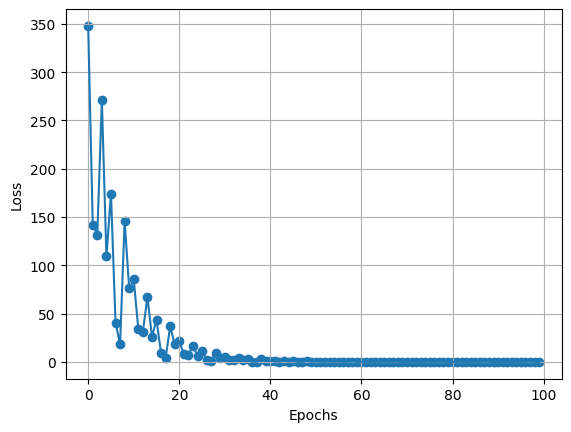

In [329]:
loss_epochs(no_of_iterations , iteration_loss)

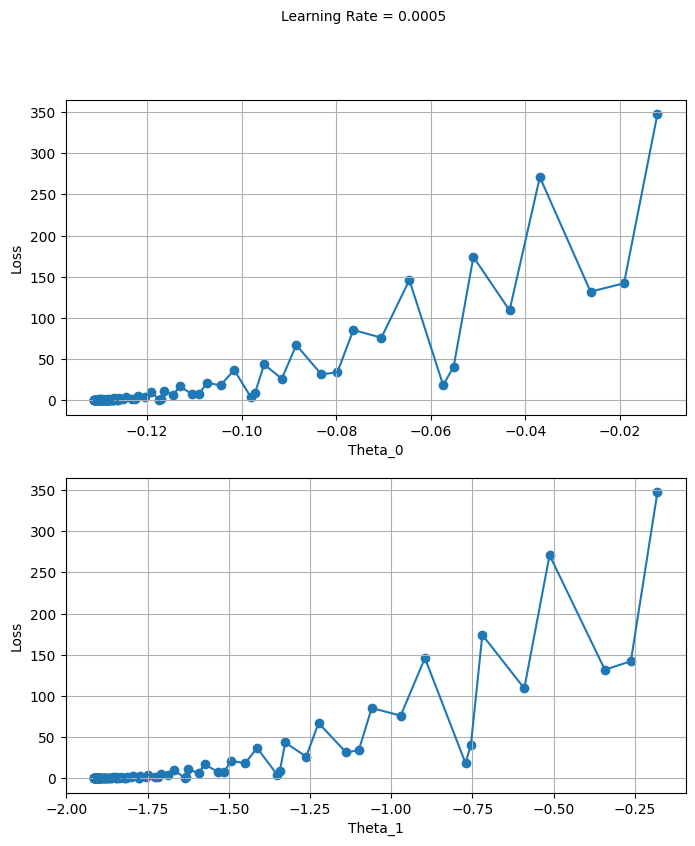

In [331]:
theta_loss(theta_0_lst , theta_1_lst , iteration_loss)

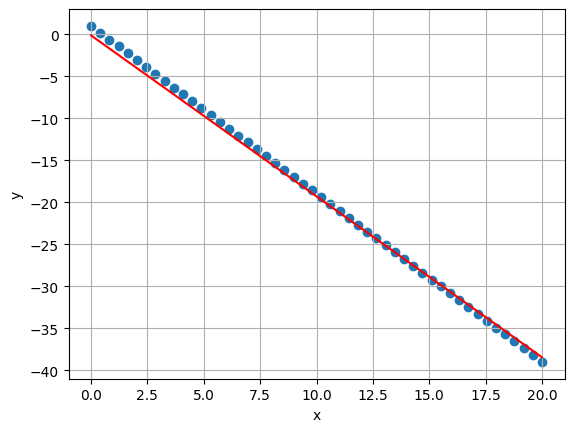

In [322]:
best_regression_lines(X , y , y_pred)

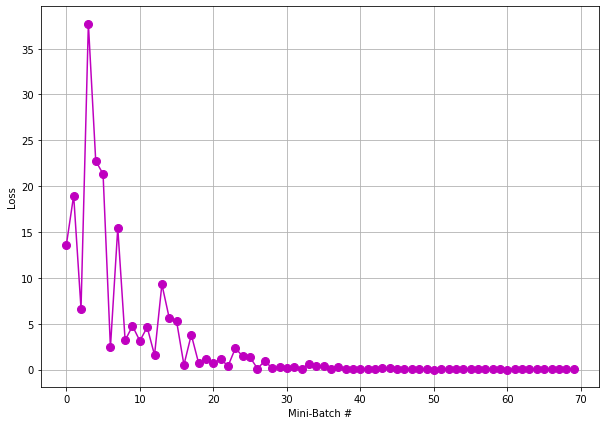

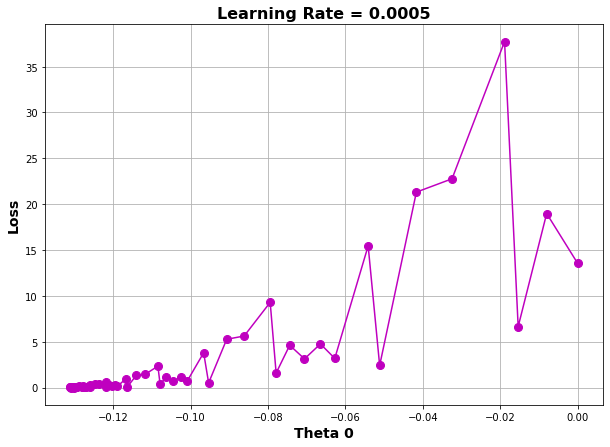

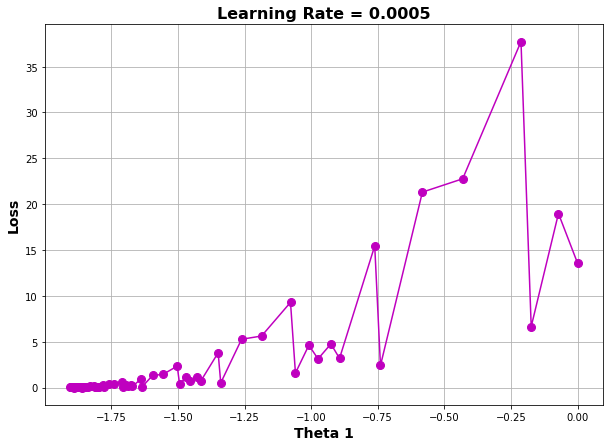

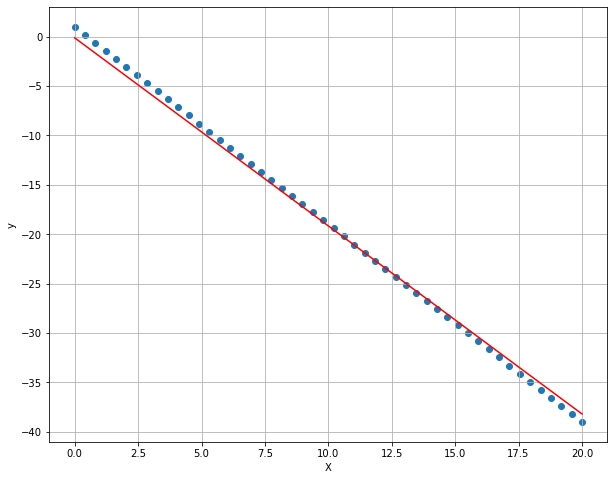

##### The following results uses batch size=10, alpha = 0.0005 and max. iterations = 300.

In [25]:
theta_0_lst , theta_1_lst , epoch_losses , iteration_loss ,hypothesis_out , theta_0 , theta_1 , no_of_iterations = mini_batch_GD_single_var(X , y , 0.0005 , 300, 10)

------------------------ Epoch 0--------------------------------
Cost =  145.59474353677862
Gradiant Vector  =  [[ 14.15536894]
 [199.69616411]]
Gradiant Vector Norm =  200.19723382197094
theta_0_new -0.041706281484383
theta_1_new -0.5683462730947177
------------------------ Epoch 1--------------------------------
Cost =  72.18569551901757
Gradiant Vector  =  [[  9.86590064]
 [140.5286456 ]]
Gradiant Vector Norm =  140.87454073995906
theta_0_new -0.07082202011809895
theta_1_new -0.9680879940041309
------------------------ Epoch 2--------------------------------
Cost =  35.85173657146306
Gradiant Vector  =  [[ 6.84911663]
 [98.91527211]]
Gradiant Vector Norm =  99.15211271060207
theta_0_new -0.09108279727606262
theta_1_new -1.2492478243028098
------------------------ Epoch 3--------------------------------
Cost =  17.863524724100923
Gradiant Vector  =  [[ 4.72742879]
 [69.64796819]]
Gradiant Vector Norm =  69.80822340829984
theta_0_new -0.10511589818169224
theta_1_new -1.447007383899527

****************** Epoch 0 ********************

Cost = 22.539550396010963

Gradient Vector:
[[ 11.67472803]
 [157.10281459]]

Gradient Vector Norm:
157.53600739932955

theta_0_new : -0.03545598365437756
theta_1_new : -0.48835190145126706

****************** Epoch 1 ********************

Cost = 11.174953219348621

Gradient Vector:
[[  8.09250368]
 [110.51346525]]

Gradient Vector Norm:
110.80936160035174

theta_0_new : -0.06610051885857628
theta_1_new : -0.9107485292034476

****************** Epoch 2 ********************

Cost = 5.548346857077597

Gradient Vector:
[[ 5.57078759]
 [77.71577392]]

Gradient Vector Norm:
77.91517946195926

theta_0_new : -0.0874575404445202
theta_1_new : -1.2081213319692865

****************** Epoch 3 ********************

Cost = 2.763748611613035

Gradient Vector:
[[ 3.7956429 ]
 [54.62706716]]

Gradient Vector Norm:
54.75877438231161

theta_0_new : -0.10227652151342273
theta_1_new : -1.4174804576423325

****************** Epoch 4 ********************

Cos

In [335]:
y_pred = theta_0 + theta_1 * X

In [336]:
print("r2_score : " ,r2_score(y , y_pred))

r2_score :  0.9976372559890987


In [337]:
no_of_iterations = np.arange(no_of_iterations)

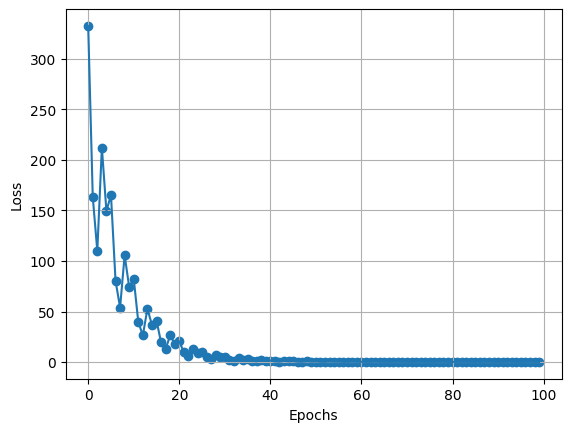

In [338]:
loss_epochs(no_of_iterations , iteration_loss)

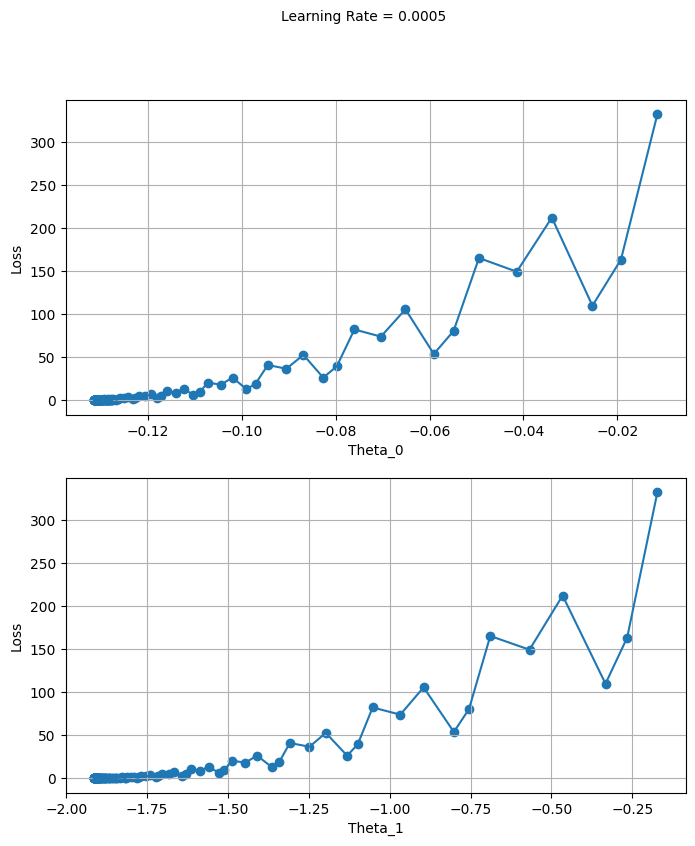

In [339]:
theta_loss(theta_0_lst ,theta_1_lst , iteration_loss)

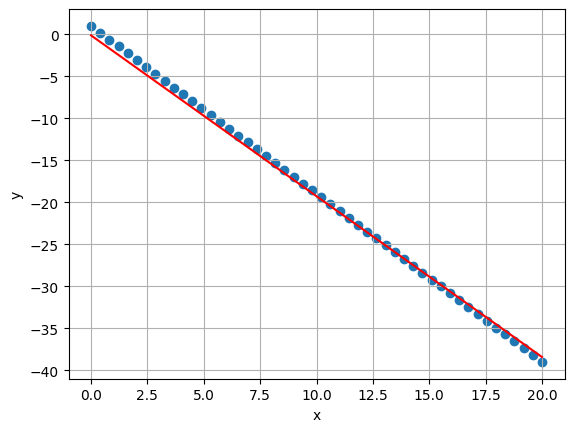

In [340]:
best_regression_lines(X, y , y_pred)

##### The following results uses batch size=20, alpha = 0.0005 and max. iterations = 300.

In [27]:
theta_0_lst , theta_1_lst , epoch_losses , iteration_loss ,hypothesis_out , theta_0 , theta_1 , no_of_iterations = mini_batch_GD_single_var(X , y , 0.0005 , 300, 20)

------------------------ Epoch 0--------------------------------
Cost =  121.01874956739258
Gradiant Vector  =  [[  8.78158852]
 [142.23730918]]
Gradiant Vector Norm =  142.50813457388193
theta_0_new -0.022521262853043105
theta_1_new -0.3066146477887266
------------------------ Epoch 1--------------------------------
Cost =  85.65947095004557
Gradiant Vector  =  [[  7.35632316]
 [119.64691805]]
Gradiant Vector Norm =  119.87285134288861
theta_0_new -0.04137884365576989
theta_1_new -0.564150972177087
------------------------ Epoch 2--------------------------------
Cost =  60.674530634302485
Gradiant Vector  =  [[  6.15921956]
 [100.67272391]]
Gradiant Vector Norm =  100.8609603564978
theta_0_new -0.05715924085000214
theta_1_new -0.7804653960471976
------------------------ Epoch 3--------------------------------
Cost =  43.01477473890198
Gradiant Vector  =  [[ 5.15375372]
 [84.73584844]]
Gradiant Vector Norm =  84.89243304435317
theta_0_new -0.0703550666041699
theta_1_new -0.962156691507

****************** Epoch 0 ********************

Cost = 126.24663174567475

Gradient Vector:
[[ 17.2116263 ]
 [234.92496791]]

Gradient Vector Norm:
235.5546234500846

theta_0_new : -0.009846938775510204
theta_1_new : -0.13470991253644315

****************** Epoch 1 ********************

Cost = 95.2117173776487

Gradient Vector:
[[ 14.90431582]
 [203.99105181]]

Gradient Vector Norm:
204.53480840347603

theta_0_new : -0.026985858149656733
theta_1_new : -0.369149480457521

****************** Epoch 2 ********************

Cost = 71.8119173096046

Gradient Vector:
[[ 12.90081071]
 [177.13009011]]

Gradient Vector Norm:
177.5992672864237

theta_0_new : -0.041830281557401115
theta_1_new : -0.5727240764439553

****************** Epoch 3 ********************

Cost = 54.168934578029884

Gradient Vector:
[[ 11.16111006]
 [153.80581204]]

Gradient Vector Norm:
154.21024024297918

theta_0_new : -0.05468232631950523
theta_1_new : -0.7494975760087796

****************** Epoch 4 ********************

In [342]:
y_pred = theta_0 + theta_1 * X

In [343]:
print("r2_score : " ,r2_score(y , y_pred))

r2_score :  0.9976201793013264


In [344]:
no_of_iterations = np.arange(no_of_iterations)

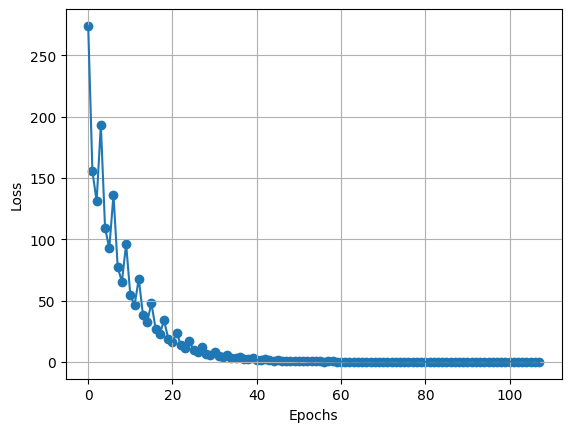

In [345]:
loss_epochs(no_of_iterations , iteration_loss)

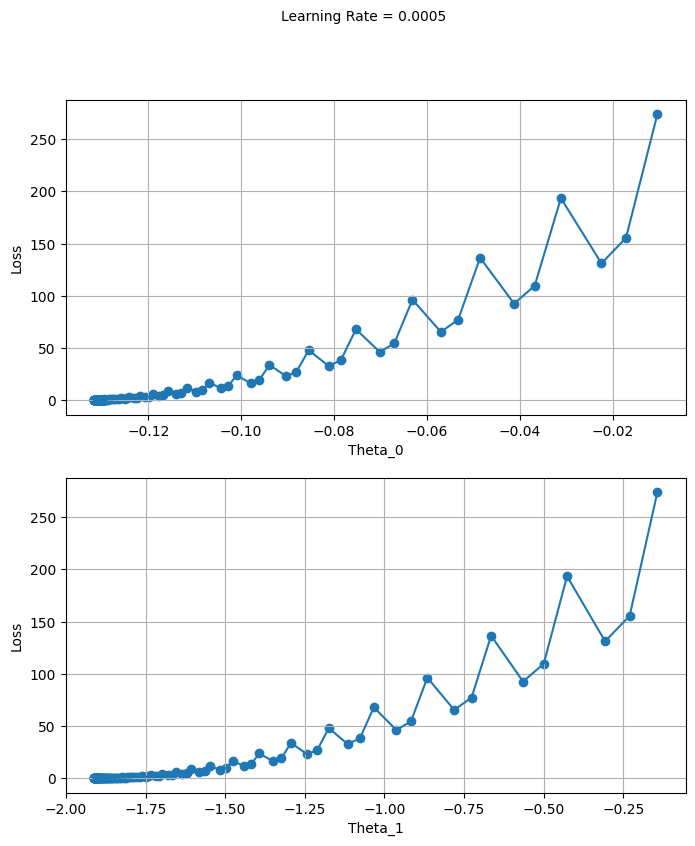

In [346]:
theta_loss(theta_0_lst , theta_1_lst , iteration_loss)

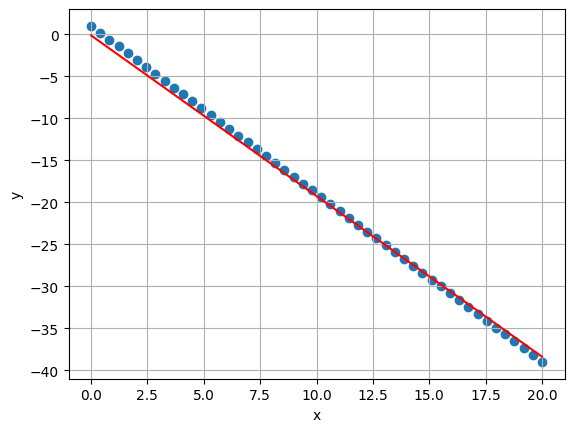

In [348]:
best_regression_lines(X , y , y_pred)

In [368]:
#general_model
def General_GD_single_var(X , y , alpha , no_of_epochs, batch_size = 1):

  shuffle_indices = np.random.permutation(len(X))
  X = X[shuffle_indices]
  y = y[shuffle_indices]

  theta_0 =0
  theta_1 = 0
  no_of_iterations = 0
  iteration_loss = []
  hypothesis_out =[]
  #error_vect = []
  theta_0_lst = []
  theta_1_lst = []
  epoch_losses = [0]

  for e in range (no_of_epochs):
      print(f'------------------------ Epoch {e}--------------------------------')

      if(batch_size > 1 ):
        for i in range (0 , len(X) , batch_size):
          y_pred =  theta_0 + theta_1 * X[i : i + batch_size]
          error = y_pred - y[i : i + batch_size]
          #error_vect.append(error)
          j = (1 / (2 * batch_size) ) *(np.linalg.norm(error) ** 2)
          iteration_loss.append(j)
          d_theta_0 =  (error).sum() / ( batch_size )
          d_theta_1 =  (error * X[i : i + batch_size]).sum() / ( batch_size )

          gradiant_vector = np.array([[d_theta_0] , [d_theta_1]])
          gradiant_vector_norm = np.linalg.norm(gradiant_vector )

          theta_0 = theta_0 - alpha * d_theta_0
          theta_0_lst.append(theta_0)
          theta_1 = theta_1 - alpha * d_theta_1
          theta_1_lst.append(theta_1)
          no_of_iterations = no_of_iterations + 1

      else :
        for i in range(X.shape[0]):
          y_pred =  theta_0 + theta_1 * X[i]
          error = y_pred - y[i]
          j = (1 /2) *(error ** 2)
          iteration_loss.append(j)
          d_theta_0 =  (error)
          d_theta_1 =  (error* X[i])

          gradiant_vector = np.array([[d_theta_0] , [d_theta_1]])
          gradiant_vector_norm = np.linalg.norm(gradiant_vector )

          theta_0 = theta_0 - alpha * d_theta_0
          theta_0_lst.append(theta_0)
          theta_1 = theta_1 - alpha * d_theta_1
          theta_1_lst.append(theta_1)
          no_of_iterations = no_of_iterations + 1

      epoch_losses.append(j)
      hypothesis_out.append(y_pred)


      print('Cost = ' , epoch_losses[-1])
      print('Gradiant Vector  = ', gradiant_vector )
      print('Gradiant Vector Norm = ', gradiant_vector_norm)
      print ('theta_0_new' , theta_0)
      print ('theta_1_new' , theta_1)

      if gradiant_vector_norm < 0.001 or (abs(epoch_losses[e] - epoch_losses[e-1]))< 0.001 :
        print(f'---------- gradiant descent covered after {e} epochs -----------')
        print ('theta_0_opt' , theta_0)
        print ('theta_1_opt' , theta_1)
        print("Error Vector : " , error)
        print()

        print('cost : ' , j)
        print()

        print('h(x) : ' , y_pred )
        print('y_actual : ' , y)
        print()

        return theta_0_lst , theta_1_lst , epoch_losses[1:] , iteration_loss ,hypothesis_out , theta_0 , theta_1 , no_of_iterations
        break


In [373]:
theta_0_lst , theta_1_lst , epoch_losses , iteration_loss ,hypothesis_out , theta_0 , theta_1 , no_of_iterations= General_GD_single_var(X , y ,0.0005 , 300, 20)

------------------------ Epoch 0--------------------------------
Cost =  82.96023811237747
Gradiant Vector  =  [[ 7.88295021]
 [99.83026381]]
Gradiant Vector Norm =  100.14101295817002
theta_0_new -0.022515145446765018
theta_1_new -0.30745913598504326
------------------------ Epoch 1--------------------------------
Cost =  58.390380941915446
Gradiant Vector  =  [[ 6.59131814]
 [83.73829845]]
Gradiant Vector Norm =  83.99731008439157
theta_0_new -0.04135741210915322
theta_1_new -0.5655678695687819
------------------------ Epoch 2--------------------------------
Cost =  41.09089859773036
Gradiant Vector  =  [[ 5.50703321]
 [70.22951086]]
Gradiant Vector Norm =  70.44509642520381
theta_0_new -0.05711640619398138
theta_1_new -0.7822481532332674
------------------------ Epoch 3--------------------------------
Cost =  28.91251478681616
Gradiant Vector  =  [[ 4.59681109]
 [58.88923745]]
Gradiant Vector Norm =  59.06837529327878
theta_0_new -0.07028708759829304
theta_1_new -0.9641502711639746
